In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mplleaflet

In [2]:
#eventually need to change file name and spell correctly
subway = pd.read_csv('spring_2017.csv', usecols=[1,2,3,4,5,6,7,8])

In [3]:
subway['datetime'] = pd.to_datetime(subway['datetime'])
subway['weekday'] = subway['datetime'].dt.weekday
subway['weekday2'] = subway['datetime'].dt.weekday_name

In [4]:
subway['date'] = subway['datetime'].dt.date

In [5]:
subway.dropna(inplace = True)

In [6]:
subway.tail()

,c/a,unit,scp,station,linename,division,datetime,hr4,weekday,weekday2,date
1179302,R419,R326,00-05-01,ZEREGA AV,6,IRT,2017-06-02 05:00:00,0.0,4,Friday,2017-06-02
1179303,R419,R326,00-05-01,ZEREGA AV,6,IRT,2017-06-02 09:00:00,0.0,4,Friday,2017-06-02
1179304,R419,R326,00-05-01,ZEREGA AV,6,IRT,2017-06-02 13:00:00,0.0,4,Friday,2017-06-02
1179305,R419,R326,00-05-01,ZEREGA AV,6,IRT,2017-06-02 17:00:00,0.0,4,Friday,2017-06-02
1179306,R419,R326,00-05-01,ZEREGA AV,6,IRT,2017-06-02 21:00:00,0.0,4,Friday,2017-06-02


In [7]:
subway.head()


,c/a,unit,scp,station,linename,division,datetime,hr4,weekday,weekday2,date
1,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 04:00:00,97.0,5,Saturday,2017-04-22
2,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 08:00:00,105.0,5,Saturday,2017-04-22
3,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 12:00:00,541.0,5,Saturday,2017-04-22
4,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 16:00:00,818.0,5,Saturday,2017-04-22
5,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 20:00:00,711.0,5,Saturday,2017-04-22


In [44]:
#subway.iloc[-1]['datetime'] - subway.iloc[0]['datetime']

Timedelta('41 days 17:00:00')

In [8]:
#subway['daily'] = subway.groupby(['station','weekday'])[['hr4']].sum()

In [8]:
subway['station_line'] = subway['station']+ ' ' + subway['linename']

In [9]:
weeklylargest = (subway
                 .groupby(['station_line','weekday', 'weekday2'],as_index=False)[['hr4']]
                 .sum()
                )
weeklylargest['hr4'] = weeklylargest['hr4']/6 #divide by 6 because we are using 6 weeks of data

In [10]:
top100=(weeklylargest
 .sort_values(['hr4'], ascending=(False))
 .head(100)
 .sort_values(['weekday', 'hr4'], ascending=(True,False))
)

In [14]:
top100.to_csv('combined_spring_data.csv')

In [11]:
top100.head(50)

,station_line,weekday,weekday2,hr4
2184,GRD CNTRL-42 ST 4567S,0,Monday,131832.333333
630,34 ST-HERALD SQ BDFMNQRW,0,Monday,111446.000000
721,42 ST-PORT AUTH ACENQRS1237W,0,Monday,83981.666667
658,34 ST-PENN STA ACE,0,Monday,73691.833333
196,14 ST-UNION SQ LNQR456W,0,Monday,62628.333333
3122,TIMES SQ-42 ST 1237ACENQRSW,0,Monday,57106.333333
2023,FLUSHING-MAIN 7,0,Monday,56345.333333
2114,FULTON ST 2345ACJZ,0,Monday,53764.833333
861,59 ST COLUMBUS ABCD1,0,Monday,50774.166667
651,34 ST-PENN STA 123ACE,0,Monday,49510.833333


f, ax = plt.subplots(figsize=(10,6))
sns.despine(left=True, bottom=True)
ax = sns.barplot(largest_plot['monthly_traffic'], largest_plot['station'])
ax.set(
    ylabel="NYC Subway Station",
    xlabel="Monthly Traffic", 
    title = "Monthly Traffic at 10 Busiest NYC Subway Stations"
    )
plt.show()

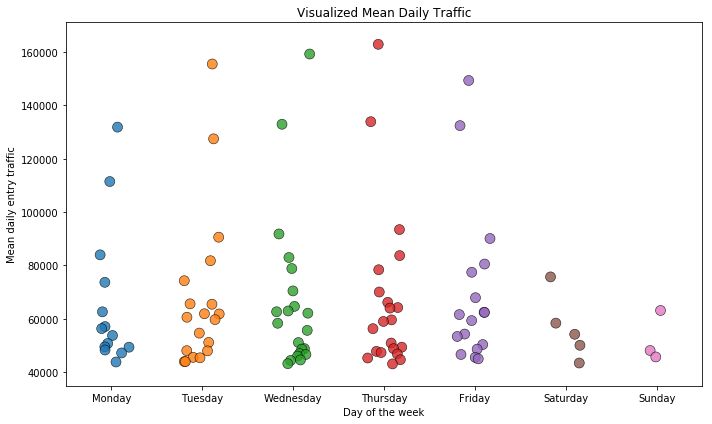

In [145]:
f,ax = plt.subplots(figsize=(10,6))
ax = sns.stripplot(x = 'weekday2', y='hr4', data=top100, jitter = .2, size=10, alpha=.8, linewidth=.6, edgecolor='black')
ax.set(
    ylabel="Mean daily entry traffic",
    xlabel="Day of the week",
    title = "Visualized Mean Daily Traffic")
plt.tight_layout()
plt.savefig('mean_daily_traffic2.png')
plt.show;

In [18]:
newdf = subway.nlargest(20, 'hr4')#continue work tomorrow to try and find the 20 busiest 4 hour blocks at stations for

In [19]:
newdf.sample(20) #i want 1 4 hour block per station... or maybe 2? it likely requires a groupby i can't think of right noiw

,c/a,unit,scp,station,linename,division,datetime,hr4,weekday,weekday2,date,station_line
786972,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-05-22 20:00:00,3775.0,0,Monday,2017-05-22,GRD CNTRL-42 ST 4567S
787504,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-25 20:00:00,3840.0,3,Thursday,2017-05-25,GRD CNTRL-42 ST 4567S
787466,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-19 20:00:00,3863.0,4,Friday,2017-05-19,GRD CNTRL-42 ST 4567S
787374,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-04 20:00:00,3762.0,3,Thursday,2017-05-04,GRD CNTRL-42 ST 4567S
243917,N504,R021,02-00-05,42 ST-BRYANT PK,BDFM7,IND,2017-05-20 00:00:00,3808.0,5,Saturday,2017-05-20,42 ST-BRYANT PK BDFM7
792005,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,2017-05-03 21:00:00,3830.0,2,Wednesday,2017-05-03,GRD CNTRL-42 ST 4567S
786303,R238,R046,00-00-06,GRD CNTRL-42 ST,4567S,IRT,2017-04-27 20:00:00,3795.0,3,Thursday,2017-04-27,GRD CNTRL-42 ST 4567S
868318,N323,R018,01-00-00,JKSN HT-ROOSVLT,EFMR7,IND,2017-05-27 00:00:00,3799.0,5,Saturday,2017-05-27,JKSN HT-ROOSVLT EFMR7
786898,R238,R046,00-03-00,GRD CNTRL-42 ST,4567S,IRT,2017-05-10 20:00:00,3890.0,2,Wednesday,2017-05-10,GRD CNTRL-42 ST 4567S
787539,R238,R046,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2017-05-31 20:00:00,3906.0,2,Wednesday,2017-05-31,GRD CNTRL-42 ST 4567S


In [13]:
daily_subway = subway.groupby(['station_line','weekday'])[['hr4']].sum()

In [14]:
daily_subway.head()

hr4
station_line weekday          
1 AV L       0        101694.0
             1        128493.0
             2        137512.0
             3        141597.0
             4        141600.0

In [15]:
daily_subway = daily_subway.reset_index()

In [16]:
def is_weekday(row):
    if row < 5:
        return 1
    else: 
        return 0

In [17]:
daily_subway['is_weekday'] = daily_subway['weekday'].apply(is_weekday)

In [18]:
daily_subway = daily_subway.groupby(['station_line','is_weekday'])[['hr4']].sum().reset_index()

In [19]:
daily_subway['idx'] = daily_subway['hr4']/daily_subway['hr4'].shift(1)
daily_subway['idx_shifted'] = daily_subway['idx'].shift(-1)
daily_subway['monthly_traffic'] = daily_subway['hr4'] + daily_subway['hr4'].shift(1)
daily_subway['monthly_traffic_shifted'] = daily_subway['monthly_traffic'].shift(-1)

In [20]:
def fix_traffic(row):
    a = row.monthly_traffic
    b = row.monthly_traffic_shifted
    c = row.is_weekday
    if (c==0):
        return b
    else:
        return a

In [21]:
def fix_idx(row):
    a = row.idx
    b = row.idx_shifted
    c = row.is_weekday
    if (c==0):
        return b
    else:
        return a

In [22]:
daily_subway['monthly_traffic'] = daily_subway.apply(fix_traffic, axis=1)
daily_subway['idx'] = daily_subway.apply(fix_idx, axis=1)

In [23]:
daily_subway.drop(['monthly_traffic_shifted', 'idx_shifted'], axis=1, inplace=True)

In [25]:
daily_subway['scaled_idx'] = daily_subway['idx']/2.5

In [30]:
daily_subway.head()

,station_line,is_weekday,hr4,idx,monthly_traffic,scaled_idx
0,1 AV L,0,138403.0,4.702904,789299.0,1.881162
1,1 AV L,1,650896.0,4.702904,789299.0,1.881162
2,103 ST 1,0,92615.0,4.194828,481119.0,1.677931
3,103 ST 1,1,388504.0,4.194828,481119.0,1.677931
4,103 ST 6,0,84779.0,5.107538,517791.0,2.043015


In [26]:
daily_largest = daily_subway.groupby(['station_line','is_weekday'])[['monthly_traffic', 'scaled_idx']].sum().reset_index()

In [27]:
daily_largest = daily_largest[daily_largest.is_weekday == 1]

In [95]:
daily_largest['weekly_traffic'] = daily_largest['monthly_traffic']/(.75*7)

In [96]:
weekly = daily_largest.reset_index()[['station_line','weekly_traffic','scaled_idx']]

In [97]:
weekly['traffic'] = weekly['weekly_traffic'].astype(int)

In [98]:
weekly = weekly[['station_line','traffic','scaled_idx']].round(2)

In [99]:
weekly.head()

,station_line,traffic,scaled_idx
0,1 AV L,150342,1.88
1,103 ST 1,91641,1.68
2,103 ST 6,98626,2.04
3,103 ST BC,33687,2.05
4,103 ST-CORONA 7,148125,1.54


(array([339., 101.,  18.,   8.,   4.,   2.,   1.,   0.,   0.,   2.]),
 array([2.300000e+01, 9.863070e+04, 1.972384e+05, 2.958461e+05,
        3.944538e+05, 4.930615e+05, 5.916692e+05, 6.902769e+05,
        7.888846e+05, 8.874923e+05, 9.861000e+05]),
 <a list of 10 Patch objects>)

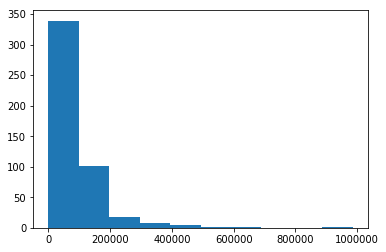

In [100]:
plt.hist(weekly['traffic'])

In [64]:
weekly_largest = weekly[weekly['traffic']> 150000]

In [90]:
subway[(subway.station_line=='BOWLING GREEN 45')& (subway.weekday ==5)]

,c/a,unit,scp,station,linename,division,datetime,hr4,weekday,weekday2,date,station_line
538181,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-22 04:00:00,0.0,5,Saturday,2017-04-22,BOWLING GREEN 45
538182,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-22 08:00:00,0.0,5,Saturday,2017-04-22,BOWLING GREEN 45
538183,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-22 12:00:00,1.0,5,Saturday,2017-04-22,BOWLING GREEN 45
538184,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-22 16:00:00,1.0,5,Saturday,2017-04-22,BOWLING GREEN 45
538185,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-22 20:00:00,1.0,5,Saturday,2017-04-22,BOWLING GREEN 45
538222,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-29 00:00:00,54.0,5,Saturday,2017-04-29,BOWLING GREEN 45
538223,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-29 04:00:00,0.0,5,Saturday,2017-04-29,BOWLING GREEN 45
538224,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-29 08:00:00,0.0,5,Saturday,2017-04-29,BOWLING GREEN 45
538225,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-29 12:00:00,0.0,5,Saturday,2017-04-29,BOWLING GREEN 45
538226,R201,R041,00-00-00,BOWLING GREEN,45,IRT,2017-04-29 16:00:00,1.0,5,Saturday,2017-04-29,BOWLING GREEN 45


In [72]:
#weekly_largest.nlargest(10,'scaled_idx')

In [101]:
weekly[weekly['traffic']> 100000].nlargest(20,'scaled_idx')

,station_line,traffic,scaled_idx
462,WALL ST 45,115870,103.32
218,BOWLING GREEN 45,178888,32.37
110,5 AV/53 ST EM,158672,5.15
284,EXCHANGE PLACE 1,110393,4.21
384,NEWARK BM BW 1,112793,3.83
354,LEXINGTON AV/53 EM6,282634,3.45
214,BOROUGH HALL 2345R,227549,3.44
132,68ST-HUNTER CO 6,162323,3.37
302,FULTON ST 2345ACJZ,399861,3.35
244,CHAMBERS ST ACE23,213049,3.31


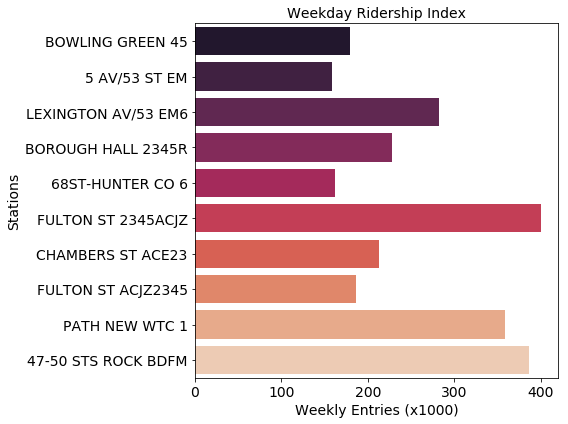

In [160]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(8,6))

source = weekly[weekly['traffic']> 150000].nlargest(10,'scaled_idx')


stations = source.station_line
y_pos = np.arange(len(stations))
traffic = source.traffic


ax = sns.barplot(traffic/1000,stations,palette='rocket')
ax.set(ylabel = 'Stations',
       xticks = [0,100,200,300,400],

xlabel=('Weekly Entries (x1000)'),
title=('Weekday Ridership Index'))


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
        
plt.tight_layout()
plt.savefig('new_idx.png',dpi=300)

In [108]:
top_loc = weekly[weekly['traffic']> 150000].nlargest(10,'scaled_idx')
top_loc

,station_line,traffic,scaled_idx
218,BOWLING GREEN 45,178888,32.37
110,5 AV/53 ST EM,158672,5.15
354,LEXINGTON AV/53 EM6,282634,3.45
214,BOROUGH HALL 2345R,227549,3.44
132,68ST-HUNTER CO 6,162323,3.37
302,FULTON ST 2345ACJZ,399861,3.35
244,CHAMBERS ST ACE23,213049,3.31
303,FULTON ST ACJZ2345,186244,3.28
403,PATH NEW WTC 1,358773,3.27
107,47-50 STS ROCK BDFM,386363,3.13


In [131]:
loc = ['POINT (-74.01400799803432 40.70491399928076)','POINT (-73.9752485052734 40.76008683231326)','POINT (-73.96907237490204 40.75746830782865)','POINT (-73.98999799960687 40.693218999611084)','POINT (-73.96387000158042 40.76814100049679)','POINT (-74.00657099970202 40.70941599925865)','POINT (-74.00858473570133 40.714111000774025)','POINT (-74.00793800110387 40.71002266658424)','POINT (-74.00974461517701 40.71256392680817)','POINT (-73.98133100227702 40.75864100159815)']

m = np.asarray(loc)
top_loc['loc'] = m

top_loc['lon'] = top_loc['loc'].apply(lambda x: float( x.split(' ')[1][1:]))
top_loc['lat'] = top_loc['loc'].apply(lambda x: float( x.split(' ')[2][:-1]))
top_loc.drop(['loc'],axis=1,inplace=True)
#top_loc.loc[218]['scaled_idx']

new_loc = top_loc.reset_index()

In [139]:
def fixloc(x):
    if x > 5.5:
        return 6
    else: return x

In [141]:
new_loc['fix_idx'] = new_loc['scaled_idx'].apply(fixloc)

In [142]:
new_loc

,index,station_line,traffic,scaled_idx,lon,lat,fix_idx
0,218,BOWLING GREEN 45,178888,32.37,-74.014008,40.704914,6.00
1,110,5 AV/53 ST EM,158672,5.15,-73.975249,40.760087,5.15
2,354,LEXINGTON AV/53 EM6,282634,3.45,-73.969072,40.757468,3.45
3,214,BOROUGH HALL 2345R,227549,3.44,-73.989998,40.693219,3.44
4,132,68ST-HUNTER CO 6,162323,3.37,-73.963870,40.768141,3.37
5,302,FULTON ST 2345ACJZ,399861,3.35,-74.006571,40.709416,3.35
6,244,CHAMBERS ST ACE23,213049,3.31,-74.008585,40.714111,3.31
7,303,FULTON ST ACJZ2345,186244,3.28,-74.007938,40.710023,3.28
8,403,PATH NEW WTC 1,358773,3.27,-74.009745,40.712564,3.27
9,107,47-50 STS ROCK BDFM,386363,3.13,-73.981331,40.758641,3.13


In [169]:
import mplleaflet
plt.scatter(x=new_loc['lon'],y=new_loc['lat'],s=(new_loc['fix_idx']/3)**2*300,c='red',edgecolor='black')
mplleaflet.show(tiles='esri_natgeo')

In [111]:
old_idx = pd.read_csv('top_idx_latlon.csv')

In [115]:
old_idx['station_line'] = old_idx.stl

,station_line,traffic,scaled_idx,Unnamed: 0,stl,idx,weekly_traffic,scaled_weekday_index,lat,lon,station_lineold
218,BOWLING GREEN 45,178888,32.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,5 AV/53 ST EM,158672,5.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,LEXINGTON AV/53 EM6,282634,3.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,BOROUGH HALL 2345R,227549,3.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,68ST-HUNTER CO 6,162323,3.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,FULTON ST 2345ACJZ,399861,3.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,CHAMBERS ST ACE23,213049,3.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,FULTON ST ACJZ2345,186244,3.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,PATH NEW WTC 1,358773,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,47-50 STS ROCK BDFM,386363,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
daily_largest = daily_largest.reset_index()

In [35]:
daily_largest['idx'].nlargest()

370    297.254753
462    258.300085
408    248.962871
196    198.412621
279    173.732614
Name: idx, dtype: float64

In [36]:
daily_largest.nlargest(10,'monthly_traffic')

,index,station_line,is_weekday,monthly_traffic,idx
312,625,GRD CNTRL-42 ST 4567S,1,5177028.0,7.287130
90,181,34 ST-HERALD SQ BDFMNQRW,1,4661581.0,4.595061
103,207,42 ST-PORT AUTH ACENQRS1237W,1,3313740.0,4.395688
94,189,34 ST-PENN STA ACE,1,2869149.0,5.334963
28,57,14 ST-UNION SQ LNQR456W,1,2768410.0,4.139133
446,893,TIMES SQ-42 ST 1237ACENQRSW,1,2485767.0,3.984514
289,579,FLUSHING-MAIN 7,1,2260896.0,4.062644
123,247,59 ST COLUMBUS ABCD1,1,2229079.0,4.034474
302,605,FULTON ST 2345ACJZ,1,2099273.0,8.365358
107,215,47-50 STS ROCK BDFM,1,2028410.0,7.828694


In [45]:
daily_largest['monthly_traffic_corrected'] = (daily_largest['monthly_traffic']*.75)

In [46]:
largest_plot = daily_largest.nlargest(10,'monthly_traffic')[['station_line','monthly_traffic']]

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

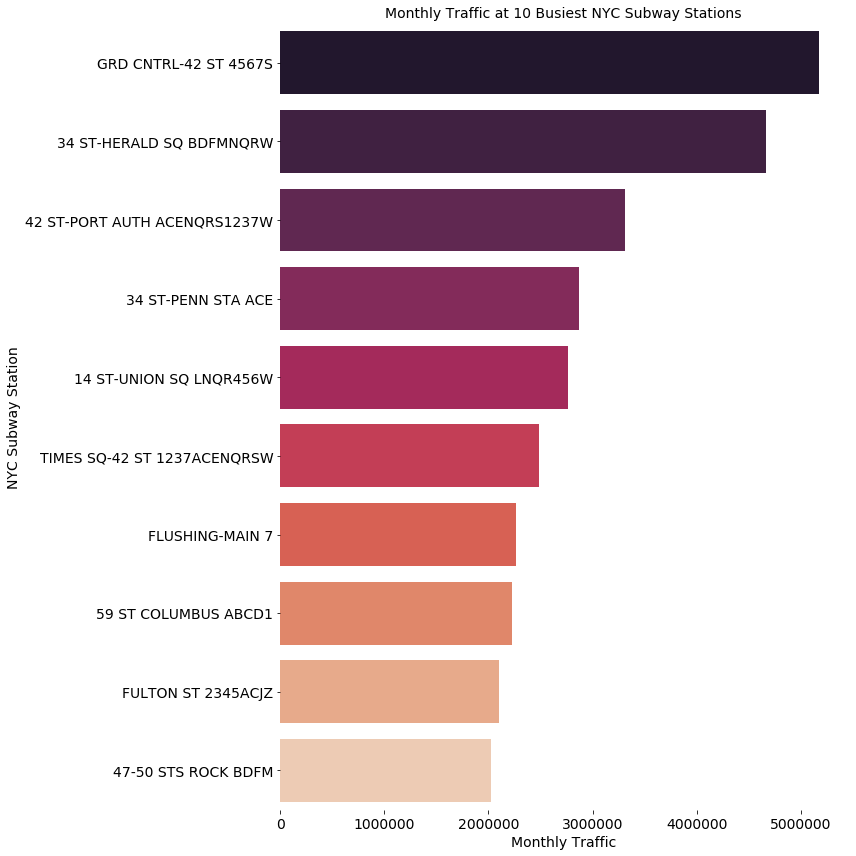

In [204]:
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(left=True, bottom=True)
ax = sns.barplot(largest_plot['monthly_traffic'], largest_plot['station_line'], palette='rocket')
ax.set(
    ylabel="NYC Subway Station",
    xlabel="Monthly Traffic", 
    title = "Monthly Traffic at 10 Busiest NYC Subway Stations"
    )

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
    
plt.tight_layout()
plt.savefig('monthly_traffic_top_10.png', dpi=300)
plt.show()


  data = subway_df.groupby(['latitude', 'longitude'], as_index=False).sum()[['latitude', 'longitude', 'ENTRIESn_hourly', 'EXITSn_hourly']]
  plt.scatter(data['longitude'], data['latitude'], s=data['ENTRIESn_hourly']/data['ENTRIESn_hourly'].std()*50, alpha=0.5, color='orange')
  import mplleaflet
  mplleaflet.show()

In [187]:
df_10busy = pd.read_csv('busiest_10_subway.csv', names=['station', 'latlong'])

In [188]:
df_10busy = df_10busy.dropna()

In [189]:
df_10busy['long'] = df_10busy['latlong'].apply(lambda x:float(x.split(' ')[1][1:]))

In [190]:
df_10busy['lat'] = df_10busy['latlong'].apply(lambda x:float(x.split(' ')[2][:-1]))

In [191]:
df_10busy.drop(['latlong'], axis=1, inplace = True)

In [192]:
df2 = daily_largest['monthly_traffic'].nlargest(10)
df2 = df2/8000 #arbitrary scaling number
df_10busy = df_10busy.assign(traffic=pd.Series(df2).values)

In [193]:
plt.scatter(x= df_10busy['long'], y= df_10busy['lat'], s=df_10busy['traffic'], color='red', edgecolors='black')
mplleaflet.show(tiles='esri_natgeo')

In [194]:
df_10busy

,station,long,lat,traffic
0,Grand Central - 42nd St,-73.976713,40.751807,647.128500
1,Herald Sq - 34th St,-73.987937,40.749645,582.697625
2,42nd St - Port Authority Bus Term,-73.989735,40.757308,414.217500
3,Penn 34,-73.991057,40.750373,358.643625
4,Union Sq - 14th St,-73.990670,40.734763,346.051250
5,Times Sq - 42nd St,-73.986768,40.754612,310.720875
6,Flushing - Main St,-73.830030,40.759600,282.612000
7,59th St - Columbus Circle,-73.981649,40.768250,278.634875
8,Fulton St,-74.007938,40.710023,262.409125
9,47th-50th Sts - Rockefeller Ctr,-73.981331,40.758641,253.551250


In [ ]:
#Sakura Dataset

In [30]:
df_topstation = pd.read_csv('top_station_latlong.csv', names=['station', 'lines', 'freq', 'latlong'])

In [31]:
df_topstation = df_topstation.dropna()

In [32]:
df_topstation['long'] = df_topstation['latlong'].apply(lambda x:float(x.split(' ')[1][1:]))

In [33]:
df_topstation['lat'] = df_topstation['latlong'].apply(lambda x:float(x.split(' ')[2][:-1]))

In [34]:
df_topstation.drop(['latlong'], axis=1, inplace = True)

In [35]:
df_topstation.drop([4, 7, 9, 14, 19], inplace = True)

In [36]:
df_topstation['freq'] = df_topstation['freq']*75

In [37]:
plt.scatter(x= df_topstation['long'], y= df_topstation['lat'], s=df_topstation['freq'], color='red', edgecolors='black')
mplleaflet.show(tiles='esri_natgeo')

,station,lines,freq,long,lat
0,14 ST-UNION SQ,LNQR456W,70000,-73.990539,40.735872
1,34 ST-HERALD SQ,BDFMNQRW,70000,-73.987772,40.749789
2,34 ST-PENN STA,123ACE,50000,-73.991057,40.750373
3,34 ST-PENN STA,ACE,60000,-73.991057,40.750373
5,42 ST-PORT AUTH,ACENQRS1237W,70000,-73.989735,40.757308
6,47-50 STS ROCK,BDFM,50000,-73.981331,40.758641
8,59 ST COLUMBUS,ABCD1,50000,-73.981649,40.768250
10,CANAL ST,JNQRZ6W,50000,-73.999826,40.718174
11,FLUSHING-MAIN,7,50000,-73.830030,40.759600
12,FULTON ST,2345ACJZ,50000,-74.007938,40.710023


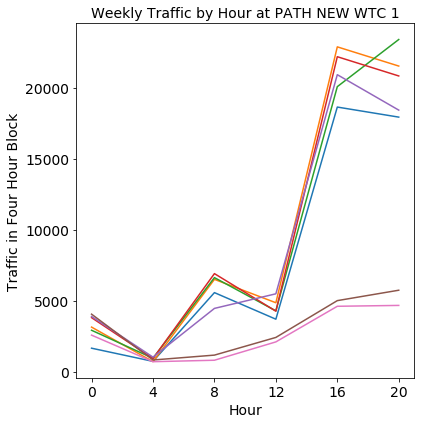

In [166]:
station = "PATH NEW WTC 1"


ttst=subway[subway['station_line'] == station].set_index(['datetime'])

resample_ttst = ttst['hr4'].resample('4H',label='left').sum().reset_index()
resample_ttst['time'] = resample_ttst['datetime'].dt.hour
resample_ttst['weekday'] = resample_ttst['datetime'].dt.weekday
n = resample_ttst.groupby(['weekday','time'])['hr4'].mean().reset_index()

fig,ax = plt.subplots(figsize=(6,6))

for i in range(7):
    plt.plot(n[n['weekday']==i]['time'],n[n['weekday']==i]['hr4'])
    
ax.set(
    ylabel="Traffic in Four Hour Block",
    xticks = [0,4,8,12,16,20],
    xlabel="Hour", 
    title = "Weekly Traffic by Hour at " + station
    )

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
        
        
plt.tight_layout()
plt.savefig('path_wtc_daily.png',dpi=300)

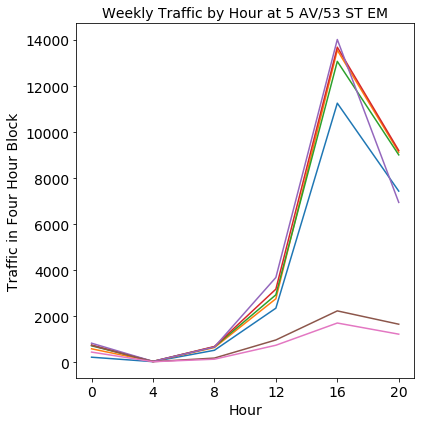

In [167]:
station = "5 AV/53 ST EM"


ttst=subway[subway['station_line'] == station].set_index(['datetime'])

resample_ttst = ttst['hr4'].resample('4H',label='left').sum().reset_index()
resample_ttst['time'] = resample_ttst['datetime'].dt.hour
resample_ttst['weekday'] = resample_ttst['datetime'].dt.weekday
n = resample_ttst.groupby(['weekday','time'])['hr4'].mean().reset_index()

fig,ax = plt.subplots(figsize=(6,6))

for i in range(7):
    plt.plot(n[n['weekday']==i]['time'],n[n['weekday']==i]['hr4'])
    
ax.set(
    ylabel="Traffic in Four Hour Block",
    xticks = [0,4,8,12,16,20],
    xlabel="Hour", 
    title = "Weekly Traffic by Hour at " + station
    )

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
        
        
plt.tight_layout()
plt.savefig('fifth_53_dailypng',dpi=300)

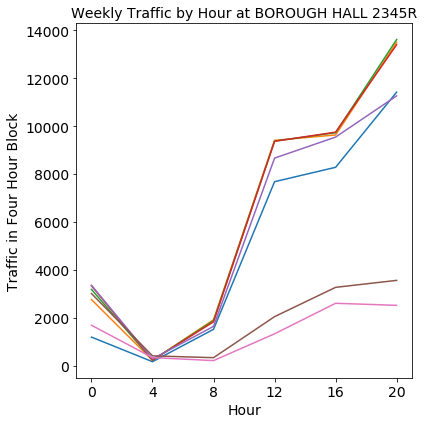

In [168]:
station = "BOROUGH HALL 2345R"


ttst=subway[subway['station_line'] == station].set_index(['datetime'])

resample_ttst = ttst['hr4'].resample('4H',label='left').sum().reset_index()
resample_ttst['time'] = resample_ttst['datetime'].dt.hour
resample_ttst['weekday'] = resample_ttst['datetime'].dt.weekday
n = resample_ttst.groupby(['weekday','time'])['hr4'].mean().reset_index()

fig,ax = plt.subplots(figsize=(6,6))

for i in range(7):
    plt.plot(n[n['weekday']==i]['time'],n[n['weekday']==i]['hr4'])
    
ax.set(
    ylabel="Traffic in Four Hour Block",
    xticks = [0,4,8,12,16,20],
    xlabel="Hour", 
    title = "Weekly Traffic by Hour at " + station
    )

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
        
        
plt.tight_layout()
plt.savefig('boro_daily.png',dpi=300)